# 0. imports

In [6]:
# Here we define our query as a multi-line string
import requests as requests
import pandas as pandas
from IPython.core.display_functions import display

# 1. Export GraphQL response to json file

## 1.1 Extracting a page to csv

Get the following info of the first page of characters:
- id
- name
- gender
- dateOfBirth
- description
- siteUrl
- favourites
- image
- ids of media participating in

In [8]:
url = 'https://graphql.anilist.co'

query = '''
query ($page: Int, $perPage: Int) {
  Page(page: $page, perPage: $perPage) {
    pageInfo {
      total
      currentPage
      lastPage
      hasNextPage
      perPage
    }
    characters {
      name {
        first
        middle
        last
        full
        native
        userPreferred
      }
      gender
      age
      dateOfBirth {
        month
        day
      }
      description
      siteUrl
      favourites
      image {
        medium
      }
      media {
        edges {
          node {
            id
          }
        }
      }
    }
  }
}
'''

# Extracting first page
variables = {
    "page": 1,
    "perPage": 50
}

data = []
has_next_page = True
page_NB = 1
while has_next_page:
    print(f"records {len(data)} Extracting page {page_NB}")
    variables['page'] = page_NB
    response = requests.post(url, json={'query': query, 'variables': variables})
    data += response.json()['data']['Page']['characters']
    page_NB += 1
    has_next_page = False

# forming dataframe from collected data
# https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-and-then-filling-it
resultDataFrame = pandas.DataFrame(data)
resultDataFrame.to_json("characters.json")
display(resultDataFrame)

records 0 Extracting page 1


,name,gender,age,dateOfBirth,description,siteUrl,favourites,image,media
0,"{'first': 'Spike', 'middle': None, 'last': 'Sp...",Male,27,"{'month': 6, 'day': 26}",__Height:__ 185 cm \n\nSpike Spiegel is a ta...,https://anilist.co/character/1,10231,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 1}}, {'node': {'id'..."
1,"{'first': 'Faye', 'middle': None, 'last': 'Val...",Female,"23 (Physical), 77 (Actual)","{'month': 8, 'day': 14}",One of the members of the bounty hunting crew ...,https://anilist.co/character/2,5658,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 1}}, {'node': {'id'..."
2,"{'first': 'Jet', 'middle': None, 'last': 'Blac...",Male,36,"{'month': 12, 'day': 3}","Jet, known on his home satellite as the ""Black...",https://anilist.co/character/3,1321,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 1}}, {'node': {'id'..."
3,"{'first': 'Ein', 'middle': None, 'last': None,...",None,None,"{'month': None, 'day': None}",Ein is a Pembroke Welsh Corgi brought aboard t...,https://anilist.co/character/4,1313,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 1}}, {'node': {'id'..."
4,"{'first': 'Ichigo', 'middle': None, 'last': 'K...",Male,15-29,"{'month': 7, 'day': 15}","__Race:__ Human, Shinigami\n__Height:__ 181 c...",https://anilist.co/character/5,7385,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 269}}, {'node': {'i..."
5,"{'first': 'Rukia', 'middle': None, 'last': 'Ku...",Female,None,"{'month': 1, 'day': 14}","__Race:__ Shinigami\n__Height:__ 144cm (4' 8"")...",https://anilist.co/character/6,3369,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 269}}, {'node': {'i..."
6,"{'first': 'Orihime', 'middle': None, 'last': '...",Female,15-29,"{'month': 9, 'day': 3}","__Race:__ Human\n__Height:__ 157 cm (5'2"")\n__...",https://anilist.co/character/7,1393,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 269}}, {'node': {'i..."
7,"{'first': 'Edward', 'middle': None, 'last': 'E...",Male,"15-16 (series), 18 (movie, End of the series)","{'month': None, 'day': None}","__Birthplace:__ Resembool, Amestris\n__Height:...",https://anilist.co/character/11,14454,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 121}}, {'node': {'i..."
8,"{'first': 'Alphonse', 'middle': None, 'last': ...",Male,14-15,"{'month': None, 'day': None}",__Birthplace:__ Resembool\n__Family:__ Edward...,https://anilist.co/character/12,4924,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 121}}, {'node': {'i..."
9,"{'first': 'Sasuke', 'middle': None, 'last': 'U...",Male,12-,"{'month': 7, 'day': 23}",__Height__: 153.2-182 cm\n\nWhen Sasuke was yo...,https://anilist.co/character/13,9272,{'medium': 'https://s4.anilist.co/file/anilist...,"{'edges': [{'node': {'id': 20}}, {'node': {'id..."


## 1.2 Import file to dataframe

Extract 10 animes from 2020 winter season (use pagination) and format the same infos as previously into a pandas dataframe.
Usefull ressources:
- https://anilist.gitbook.io/anilist-apiv2-docs/overview/graphql/pagination
- display() # Can be used to print stylish dataframe along the process

In [5]:
resultDataFrame = pandas.read_csv("characters.csv")

display(resultDataFrame)

records 0 Extracting page 1


## 1.3 Extracting multiple ressources (multiple pages)

Extract 15 animes from 2020 winter season using pagination with 5 ressources per pages. Extract same infos as before.

In [4]:
url = 'https://graphql.anilist.co'

query = '''
query ($id: Int, $page: Int, $perPage: Int, $year : Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        media (id: $id, season: WINTER, seasonYear: $year) {
            id
            title {
              romaji
              english
              native
              userPreferred
            }
            season
            seasonYear
            source
            episodes
            popularity
        }
    }
}
'''

# Extracting first page
variables = {
    'year': 2020,
    'page': 1,
    'perPage': 5
}


def get_data_from_page(page):
    variables['page'] = page
    response = requests.post(url, json={'query': query, 'variables': variables})
    return response.json()['data']['Page']['media']


data = []
for i in range(1,4):
    print("Extracting page ", i)
    data += get_data_from_page(1)

# forming dataframe from collected data
resultDataFrame = pandas.DataFrame(data)
resultDataFrame


Extracting page  1
Extracting page  2
Extracting page  3


,id,title,season,seasonYear,source,episodes,popularity
0,98515,"{'romaji': 'Hatena☆Illusion', 'english': 'Hate...",WINTER,2020,LIGHT_NOVEL,12,10231
1,99807,"{'romaji': '22/7', 'english': '22/7 (nanabun n...",WINTER,2020,OTHER,12,13830
2,100643,{'romaji': 'Made in Abyss: Fukaki Tamashii no ...,WINTER,2020,MANGA,1,86842
3,101168,"{'romaji': 'Plunderer', 'english': 'Plunderer'...",WINTER,2020,MANGA,24,71939
4,101350,"{'romaji': 'pet', 'english': 'pet', 'native': ...",WINTER,2020,MANGA,13,24355
5,98515,"{'romaji': 'Hatena☆Illusion', 'english': 'Hate...",WINTER,2020,LIGHT_NOVEL,12,10231
6,99807,"{'romaji': '22/7', 'english': '22/7 (nanabun n...",WINTER,2020,OTHER,12,13830
7,100643,{'romaji': 'Made in Abyss: Fukaki Tamashii no ...,WINTER,2020,MANGA,1,86842
8,101168,"{'romaji': 'Plunderer', 'english': 'Plunderer'...",WINTER,2020,MANGA,24,71939
9,101350,"{'romaji': 'pet', 'english': 'pet', 'native': ...",WINTER,2020,MANGA,13,24355


# 2. Generation of formated content from raw data

## 2.1 Extract filtered and sorted data

Extract the 10 most favourite characters which today is their birthday into a formatted dataframe with following infos:
- Full name
- date of birth (just to check its today)
- number of user favourite (sorted by, descendant)
- picture url

Download and store locally their picture, display 5 of them.

,favourites,name.full,dateOfBirth.month,dateOfBirth.day,image.medium
0,6575,Kazuto Kirigaya,10,7,https://s4.anilist.co/file/anilistcdn/characte...
1,820,Akihito Kanbara,10,7,https://s4.anilist.co/file/anilistcdn/characte...
2,179,Ai Hinatsuru,10,7,https://s4.anilist.co/file/anilistcdn/characte...
3,74,Momonosuke Kouzuki,10,7,https://s4.anilist.co/file/anilistcdn/characte...
4,49,Fanzell Kruger,10,7,https://s4.anilist.co/file/anilistcdn/characte...
5,49,Suirou,10,7,https://s4.anilist.co/file/anilistcdn/characte...
6,45,Nao Yorihime,10,7,https://s4.anilist.co/file/anilistcdn/characte...
7,28,Akane Ukita,10,7,https://s4.anilist.co/file/anilistcdn/characte...
8,22,Yui Narumi,10,7,https://s4.anilist.co/file/anilistcdn/characte...
9,19,Rikako Ouryou,10,7,https://s4.anilist.co/file/anilistcdn/characte...


Extracting picture of  Kazuto Kirigaya  from  https://s4.anilist.co/file/anilistcdn/character/medium/b36765-BnLbXg0Tzzh9.png
Extracting picture of  Akihito Kanbara  from  https://s4.anilist.co/file/anilistcdn/character/medium/b81757-qrft6an7FZ4F.png
Extracting picture of  Ai Hinatsuru  from  https://s4.anilist.co/file/anilistcdn/character/medium/b120673-cRr2ClHTLnfL.png
Extracting picture of  Momonosuke Kouzuki  from  https://s4.anilist.co/file/anilistcdn/character/medium/b126184-QZ8JNecT5wQc.png
Extracting picture of  Fanzell Kruger  from  https://s4.anilist.co/file/anilistcdn/character/medium/b124525-zX1uOMR5lkKr.png
Extracting picture of  Suirou  from  https://s4.anilist.co/file/anilistcdn/character/medium/b130200-24F9IkdMRsmk.png
Extracting picture of  Nao Yorihime  from  https://s4.anilist.co/file/anilistcdn/character/medium/b33218-5gZiYSyZQsTu.jpg
Extracting picture of  Akane Ukita  from  https://s4.anilist.co/file/anilistcdn/character/medium/b139831-MY9XVv20cVvC.jpg
Extracting p

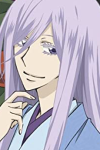


 Nao Yorihime


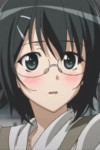


 Akane Ukita


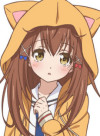


 Yui Narumi


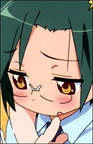


 Rikako Ouryou


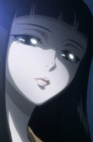

In [5]:
# Here we define our query as a multi-line string
import requests as requests
import pandas as pandas
import os as os
from PIL import Image as img
from io import BytesIO
from IPython.display import Image, display

query = '''
query ($page: Int, $perPage: Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        characters(sort: FAVOURITES_DESC, isBirthday : true){
            name {
              full
            }
            dateOfBirth {
              month
              day
            }
            favourites
            image {
              medium
            }
      }
    }
}
'''
variables = {
    'page': 1,
    'perPage': 10
}
url = 'https://graphql.anilist.co'

response = requests.post(url, json={'query': query, 'variables': variables})

resultDict = response.json()['data']['Page']['characters']
resultDataFrame  = pandas.json_normalize(resultDict)
display(resultDataFrame)

name_to_image = dict()

for character in resultDict:
    print("Extracting picture of ", character['name']['full'], " from ", character['image']['medium'])
    img_response = requests.get(character['image']['medium'])
    img_data = img_response.content
    img_path = img_response.headers['x-bz-file-name']
    name_to_image[character['name']['full']] = img.open(BytesIO(img_response.content))
    os.makedirs(os.path.dirname(img_path), exist_ok=True)
    with open(img_response.headers['x-bz-file-name'], 'wb') as handler:
        handler.write(img_data)

for name in list(name_to_image.keys())[5:]:
    print("\n",name)
    display(name_to_image[name])


## 2.2 Combine data into new content

Display their pictures into a single combined imaged saved locally. (Dont' worry about aspect ratio)

,favourites,name.full,dateOfBirth.month,dateOfBirth.day,image.medium
0,6575,Kazuto Kirigaya,10,7,https://s4.anilist.co/file/anilistcdn/characte...
1,820,Akihito Kanbara,10,7,https://s4.anilist.co/file/anilistcdn/characte...
2,179,Ai Hinatsuru,10,7,https://s4.anilist.co/file/anilistcdn/characte...
3,74,Momonosuke Kouzuki,10,7,https://s4.anilist.co/file/anilistcdn/characte...
4,49,Suirou,10,7,https://s4.anilist.co/file/anilistcdn/characte...
5,49,Fanzell Kruger,10,7,https://s4.anilist.co/file/anilistcdn/characte...
6,45,Nao Yorihime,10,7,https://s4.anilist.co/file/anilistcdn/characte...
7,28,Akane Ukita,10,7,https://s4.anilist.co/file/anilistcdn/characte...
8,22,Yui Narumi,10,7,https://s4.anilist.co/file/anilistcdn/characte...
9,19,Rikako Ouryou,10,7,https://s4.anilist.co/file/anilistcdn/characte...


Extracting picture of  Kazuto Kirigaya  from  https://s4.anilist.co/file/anilistcdn/character/medium/b36765-BnLbXg0Tzzh9.png
Extracting picture of  Akihito Kanbara  from  https://s4.anilist.co/file/anilistcdn/character/medium/b81757-qrft6an7FZ4F.png
Extracting picture of  Ai Hinatsuru  from  https://s4.anilist.co/file/anilistcdn/character/medium/b120673-cRr2ClHTLnfL.png
Extracting picture of  Momonosuke Kouzuki  from  https://s4.anilist.co/file/anilistcdn/character/medium/b126184-QZ8JNecT5wQc.png
Extracting picture of  Suirou  from  https://s4.anilist.co/file/anilistcdn/character/medium/b130200-24F9IkdMRsmk.png
Extracting picture of  Fanzell Kruger  from  https://s4.anilist.co/file/anilistcdn/character/medium/b124525-zX1uOMR5lkKr.png
Extracting picture of  Nao Yorihime  from  https://s4.anilist.co/file/anilistcdn/character/medium/b33218-5gZiYSyZQsTu.jpg
Extracting picture of  Akane Ukita  from  https://s4.anilist.co/file/anilistcdn/character/medium/b139831-MY9XVv20cVvC.jpg
Extracting p

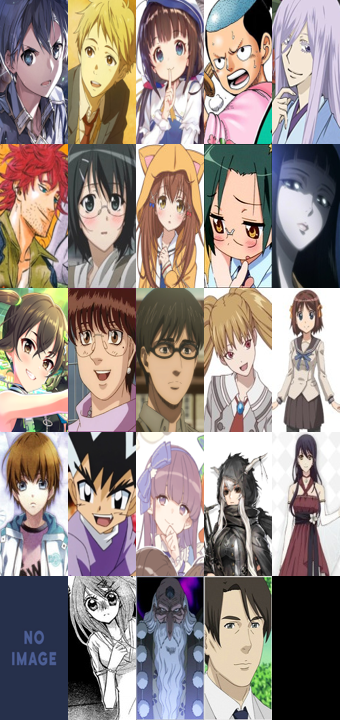

In [6]:
# Here we define our query as a multi-line string
import math
from io import BytesIO

import numpy as np
import pandas as pandas
import requests as requests
from IPython.core.display_functions import display
from PIL import Image as pil_image

query = '''
query ($page: Int, $perPage: Int) {
    Page (page: $page, perPage: $perPage) {
        pageInfo {
            total
            currentPage
            lastPage
            hasNextPage
            perPage
        }
        characters(sort: FAVOURITES_DESC, isBirthday : true){
            name {
              full
            }
            dateOfBirth {
              month
              day
            }
            favourites  
            image {
              medium
            }
      }
    }
}
'''
variables = {"page": 1, "perPage": 25}
url = 'https://graphql.anilist.co'

response = requests.post(url, json={'query': query, 'variables': variables})

resultDict = response.json()['data']['Page']['characters']
resultDataFrame = pandas.json_normalize(resultDict)
display(resultDataFrame)

all_images = []

for character in resultDict:
    print("Extracting picture of ", character['name']['full'], " from ", character['image']['medium'])
    img_response = requests.get(character['image']['medium'])
    all_images.append(pil_image.open(BytesIO(img_response.content)))

min_shape = sorted([(np.sum(i.size), i.size) for i in all_images])[0][1]
all_images = [img.resize(min_shape) for img in all_images]

widths, heights = zip(*(i.size for i in all_images))

# number of image per row
m = col_size = 5
n = row_size = math.ceil(len(all_images) / m)
#

final = [all_images[i * m:(i + 1) * m] for i in range((len(all_images) + m - 1) // m )]

total_width = max(widths) * m
total_height = max(heights) * n
#
new_im = pil_image.new('RGB', (total_width, total_height))
#
y_offset = 0
for horizontal_imgs in final:
    x_offset = 0
    for im in horizontal_imgs:
        new_im.paste(im, (x_offset, y_offset))
        x_offset += im.size[0]
    y_offset += im.size[1]
#
# new_im.show();
display(new_im)
# new_im.save('test.jpg')

The formatted dataframe extracted in this exercices could be converted to JSON and exploited by a webpage to populate its content.
The generated pictures could also be displayed on such webpage.
But those front-end matter is not our focus for now, we only care about back-end:
- data extraction with GrahpQl
- organising the data into dataframe
- exploiting the data to generate new content